# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [28]:
# Your code here - load the dataset
import pandas as pd

ames = pd.read_csv('ames.csv', index_col = 0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [29]:
# Your code here
ames.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [30]:
# Your code here - drop columns with missing data
ames.dropna(axis = 1, inplace = True)
ames.head(10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,320,0,0,700,10,2009,WD,Normal,143000
7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,0,0,0,8,2007,WD,Normal,307000
8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,228,0,0,0,350,11,2009,WD,Normal,200000
9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,205,0,0,0,0,4,2008,WD,Abnorml,129900


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [31]:
# Your code here - continuous numeric predictor

ames.select_dtypes("number")   # A continuous numeric feature should be encoded as some sort of number

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500


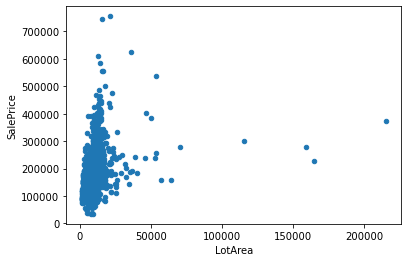

In [32]:
# Just reading from left to right,

# MSSubClass doesn't seem like a good choice, because it seems like it's a
# "code" (i.e. categorical) rather than truly numeric

# LotArea does seem like a reasonable choice. The description says:
# LotArea: Lot size in square feet

# That sounds like a number

ames.plot.scatter(x="LotArea", y="SalePrice");

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

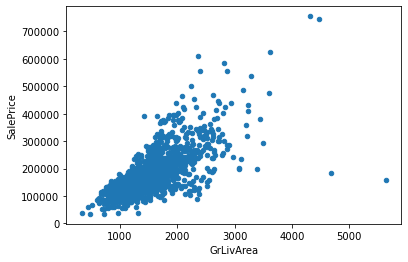

In [33]:
# The above does not look like a linear relationship so we'll try with GrLivArea
ames.plot.scatter(x = 'GrLivArea', y = 'SalePrice')

### Discrete Numeric Predictor

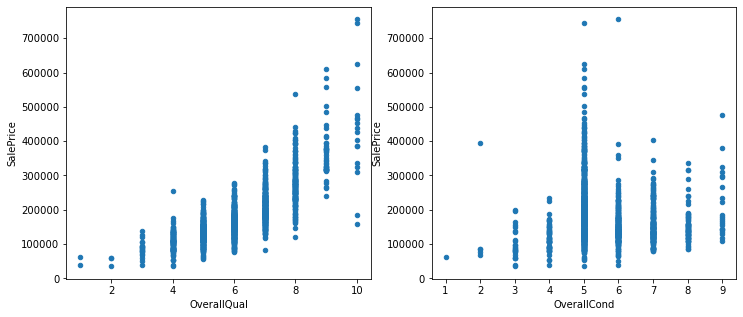

In [34]:
# Your code here - discrete numeric predictor

#Continuing left to right, OverallQual and OverallQual seem discrete
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ames.plot.scatter(x="OverallQual", y="SalePrice", ax=ax1)
ames.plot.scatter(x="OverallCond", y="SalePrice", ax=ax2);

In [35]:
# But are they numeric, and linearly related to SalePrice?

# OverallQual looks reasonable. It does seem like a quality of
# 8 is "twice as much" as a quality of 4.
# That will be our discrete numeric predictor.

### String Categorical Predictor

In [36]:
# Your code here - string categorical predictor

ames.select_dtypes('object')  #selecting all string columns

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [37]:
# That is a lot of options, we'll choose the one with only a few unique values

ames.select_dtypes('object').nunique().sort_values()

Street            2
Utilities         2
CentralAir        2
LandSlope         3
PavedDrive        3
LotShape          4
LandContour       4
KitchenQual       4
ExterQual         4
MSZoning          5
LotConfig         5
BldgType          5
HeatingQC         5
ExterCond         5
Heating           6
Foundation        6
SaleCondition     6
RoofStyle         6
Functional        7
HouseStyle        8
Condition2        8
RoofMatl          8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

In [38]:
#lotshape looks good, since there is a good amount of homes in each category
ames['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

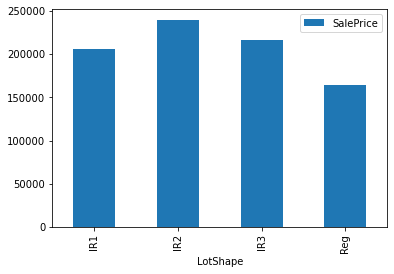

In [39]:
#plotting lotshape

ames.groupby('LotShape').mean('LotShape').sort_index().plot.bar(y='SalePrice');

In [40]:
#Looks like a good categorical predicctor. Even though some values have numbers, they don't seem to be linearly related

### Discrete Categorical Predictor

In [41]:
# Your code here - discrete categorical predictor
#we'll do the same process of looking for number of unique values, except for numeric columns
ames.select_dtypes("number").nunique().sort_values()    

HalfBath            3
BsmtHalfBath        3
FullBath            4
Fireplaces          4
KitchenAbvGr        4
BsmtFullBath        4
GarageCars          5
YrSold              5
PoolArea            8
BedroomAbvGr        8
OverallCond         9
OverallQual        10
MoSold             12
TotRmsAbvGrd       12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
dtype: int64

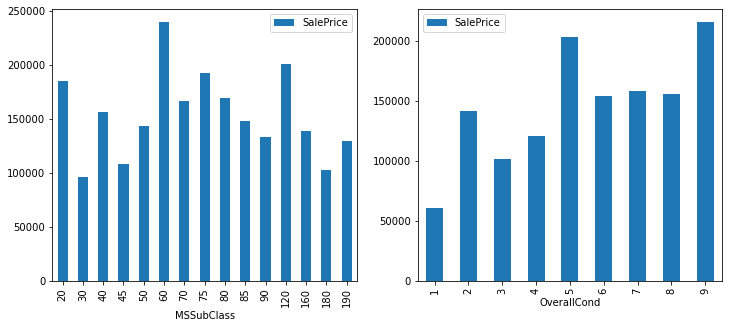

In [42]:
# the ones with relatively few categories look like they are actually numeric
# we'll go back to when we said MSSubclass and OverallCond weren't numeric

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))


ames.groupby('MSSubClass').mean('MSSubClass').plot.bar(y='SalePrice', ax=ax1)
ames.groupby('OverallCond').mean('OverallCond').plot.bar(y='SalePrice', ax=ax2);

In [43]:
# MSSubclass looks less likely like it can be used as a numeric predictor, so we'll go with that

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [44]:
# Your code here - prepare X and y, including one-hot encoding
y = ames[['SalePrice']]
X = ames[["GrLivArea", "OverallQual", "LotShape"]]
X

,GrLivArea,OverallQual,LotShape
Id,,,
1,1710,7,Reg
2,1262,6,Reg
3,1786,7,IR1
4,1717,7,IR1
5,2198,8,IR1
...,...,...,...
1456,1647,6,Reg
1457,2073,6,Reg
1458,2340,7,Reg


In [45]:
X = pd.get_dummies(X, columns = ['LotShape'], drop_first=True, dtype = int)
X

,GrLivArea,OverallQual,LotShape_IR2,LotShape_IR3,LotShape_Reg
Id,,,,,
1,1710,7,0,0,1
2,1262,6,0,0,1
3,1786,7,0,0,0
4,1717,7,0,0,0
5,2198,8,0,0,0
...,...,...,...,...,...
1456,1647,6,0,0,1
1457,2073,6,0,0,1
1458,2340,7,0,0,1


In [52]:
# Your answer here - which category or categories were dropped?

# LotShape_IR1 was dropped

In [53]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     759.4
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        06:22:36   Log-Likelihood:                -17607.
No. Observations:                1460   AIC:                         3.523e+04
Df Residuals:                    1454   BIC:                         3.526e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -8.92e+04   5574.151    -16.002      0.000      -1e+05   -7.83e+04
GrLivArea       54.5636      2.613     20.881      0.000      49.438      59.689
OverallQual   3.213e+04    990.676     32.429      0.000    3.02e+04    3.41e+04
LotShape_IR2  1.407e+04   6822.693      2.062      0.039     683.451    2.75e+04
LotShape_IR3  -2.84e+04   1.34e+04     -2.116      0.035   -5.47e+04   -2070.141
LotShape_Reg -1.376e+04   2396.494     -5.742      0.000   -1.85e+04   -9059.887
==============================================================================
Omnibus:                      366.932   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8050.129
Skew:                           0.620   Prob(JB):                         0.00
Kurtosis:                      14.437   Cond. No.                     1.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

<function matplotlib.pyplot.show(close=None, block=None)>

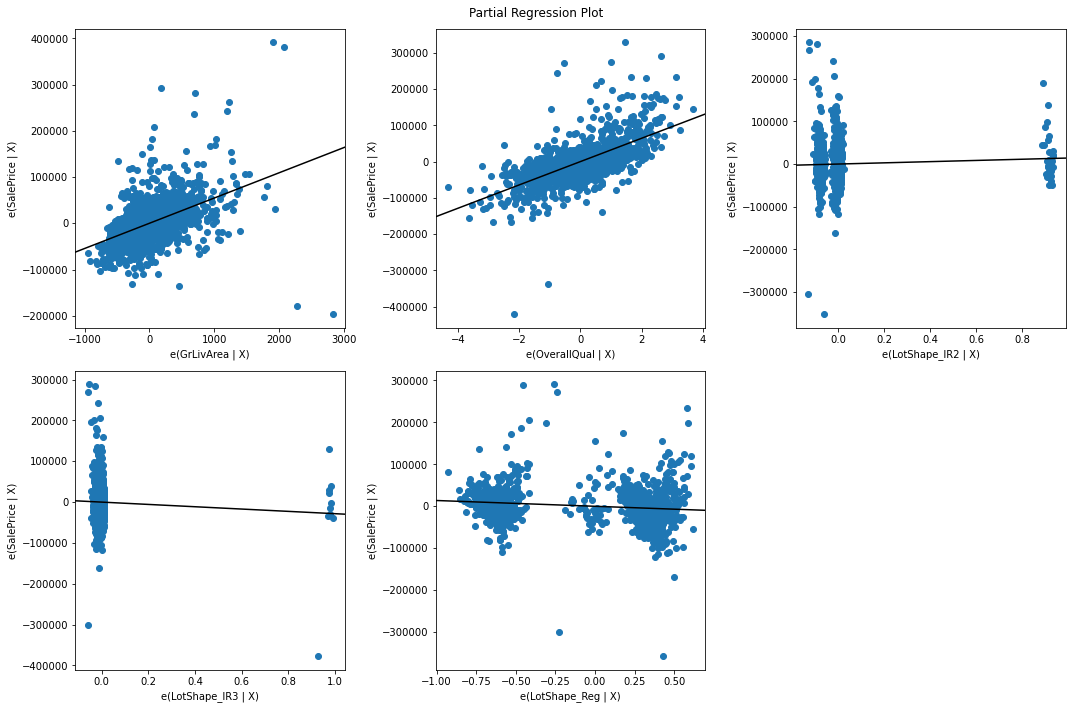

In [ ]:
# Your code here - create partial regression plots
fig = plt.figure(figsize = (15, 10))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx = list(X.columns),
    grid = (2,3),
    fig = fig
)

plt.tight_layout
plt.show

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [58]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = results.predict(sm.add_constant(X))
mean_absolute_error(y, y_pred)

28396.050798992394

In [61]:
mean_squared_error(y, y_pred,squared=False)

41790.20630027679

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [62]:
# Your answer here

"""
Our model is statistically significant overall, and explains about 72% of the
variance in SalePrice. On average it is off by about $28k in its predictions
of home price.

All of our coefficients are statistically significant

So we can say that:

const: When above-grade living area is 0, overall quality is 0, and lot shape
       is slightly irregular, we would expect a home sale price of -$89k
       
GrLivArea: For each increase of 1 sqft in above-grade living area, we see an
           associated increase of about $55 in sale price

OverallQual: For each increase of 1 in overall quality, we see an associated
             increase of about $32k in sale price

LotShape_IR2: Compared to a slightly irregular lot shape, we see an associated
              increase of about $14k for a moderately irregular lot shape

LotShape_IR3: Compared to a slightly irregular lot shape, we see an associated
              decrease of about $28k for an irregular lot shape

LotShape_Reg: Compared to a slightly irregular lot shape, we see an associated
              decrease of about $14k for a regular lot shape

Looking at the partial regression plots, the dummy variables look fairly
different from the other variables. They tend to have two clusters rather than
a continuous "cloud". Given the relatively small numbers in IR2 and IR3, I
wonder if a better model would have these binned together with IR1 instead.
"""

'\nOur model is statistically significant overall, and explains about 72% of the\nvariance in SalePrice. On average it is off by about $28k in its predictions\nof home price.\n\nAll of our coefficients are statistically significant\n\nSo we can say that:\n\nconst: When above-grade living area is 0, overall quality is 0, and lot shape\n       is slightly irregular, we would expect a home sale price of -$89k\n       \nGrLivArea: For each increase of 1 sqft in above-grade living area, we see an\n           associated increase of about $55 in sale price\n\nOverallQual: For each increase of 1 in overall quality, we see an associated\n             increase of about $32k in sale price\n\nLotShape_IR2: Compared to a slightly irregular lot shape, we see an associated\n              increase of about $14k for a moderately irregular lot shape\n\nLotShape_IR3: Compared to a slightly irregular lot shape, we see an associated\n              decrease of about $28k for an irregular lot shape\n\nLotSha

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [ ]:
# Your code here


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.